## Dataset Diabetes

Este conjunto de datos proviene originalmente del Instituto Nacional de Diabetes y Enfermedades Digestivas y Renales. El objetivo del conjunto de datos es predecir si un paciente tiene o no diabetes, basándose en ciertas medidas diagnósticas incluidas en el conjunto de datos. Se impusieron varias restricciones en la selección de estas instancias de una base de datos más grande. En particular, todos los pacientes aquí son mujeres mayores de 21 años de herencia india Pima.

### Cargar los datos

Abrir el archivo `diabetes.csv` en la carpeta `1_datos`. Analizar su estructura y responder las siguientes preguntas:

*   ¿Cuántas instancias o ejemplos tiene el dataset? == tiene 768 instancias o registros
*   ¿Cómo se llama la variable de salida o target? ¿Qué tipo de datos es? == es boolean, true o false. llamada Outcome
*   ¿Cuántos atributos posee cada instancia o ejemplo?¿Puede detectar datos faltantes o mal registrados en algún atributo? si en info() explica cuantos not null hay y cuanto null si hay
*   ¿Qué tipo de dato tiene cada atributo? en orden = int,int,float,float,float,float,float, int, boolean.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df_diabetes = pd.read_csv("./1_datos/diabetes.csv")
df_diabetes.head()

,Unnamed: 0,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0,6,148,72.0,35.0,0.0,33.6,0.627,50,1
1,1,1,85,66.0,29.0,0.0,26.6,0.351,31,0
2,2,8,183,64.0,0.0,0.0,23.3,0.672,32,1
3,3,1,89,66.0,23.0,94.0,28.1,0.167,21,0
4,4,0,137,40.0,35.0,168.0,43.1,2.288,33,1


In [3]:
df_diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                768 non-null    int64  
 1   Pregnancies               768 non-null    int64  
 2   Glucose                   768 non-null    int64  
 3   BloodPressure             767 non-null    float64
 4   SkinThickness             756 non-null    float64
 5   Insulin                   763 non-null    float64
 6   BMI                       767 non-null    float64
 7   DiabetesPedigreeFunction  768 non-null    float64
 8   Age                       768 non-null    int64  
 9   Outcome                   768 non-null    int64  
dtypes: float64(5), int64(5)
memory usage: 60.1 KB


In [4]:
df_diabetes.describe()

,Unnamed: 0,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,767.000000,756.000000,763.000000,767.000000,768.000000,768.000000,768.000000
mean,383.500000,3.845052,120.894531,69.195567,20.862434,80.322412,32.034289,0.471876,33.240885,0.348958
std,221.846794,3.369578,31.972618,19.206609,15.865314,115.439459,7.804050,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,191.750000,1.000000,99.000000,63.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,383.500000,3.000000,117.000000,72.000000,23.000000,36.000000,32.000000,0.372500,29.000000,0.000000
75%,575.250000,6.000000,140.250000,80.000000,32.000000,128.500000,36.600000,0.626250,41.000000,1.000000
max,767.000000,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


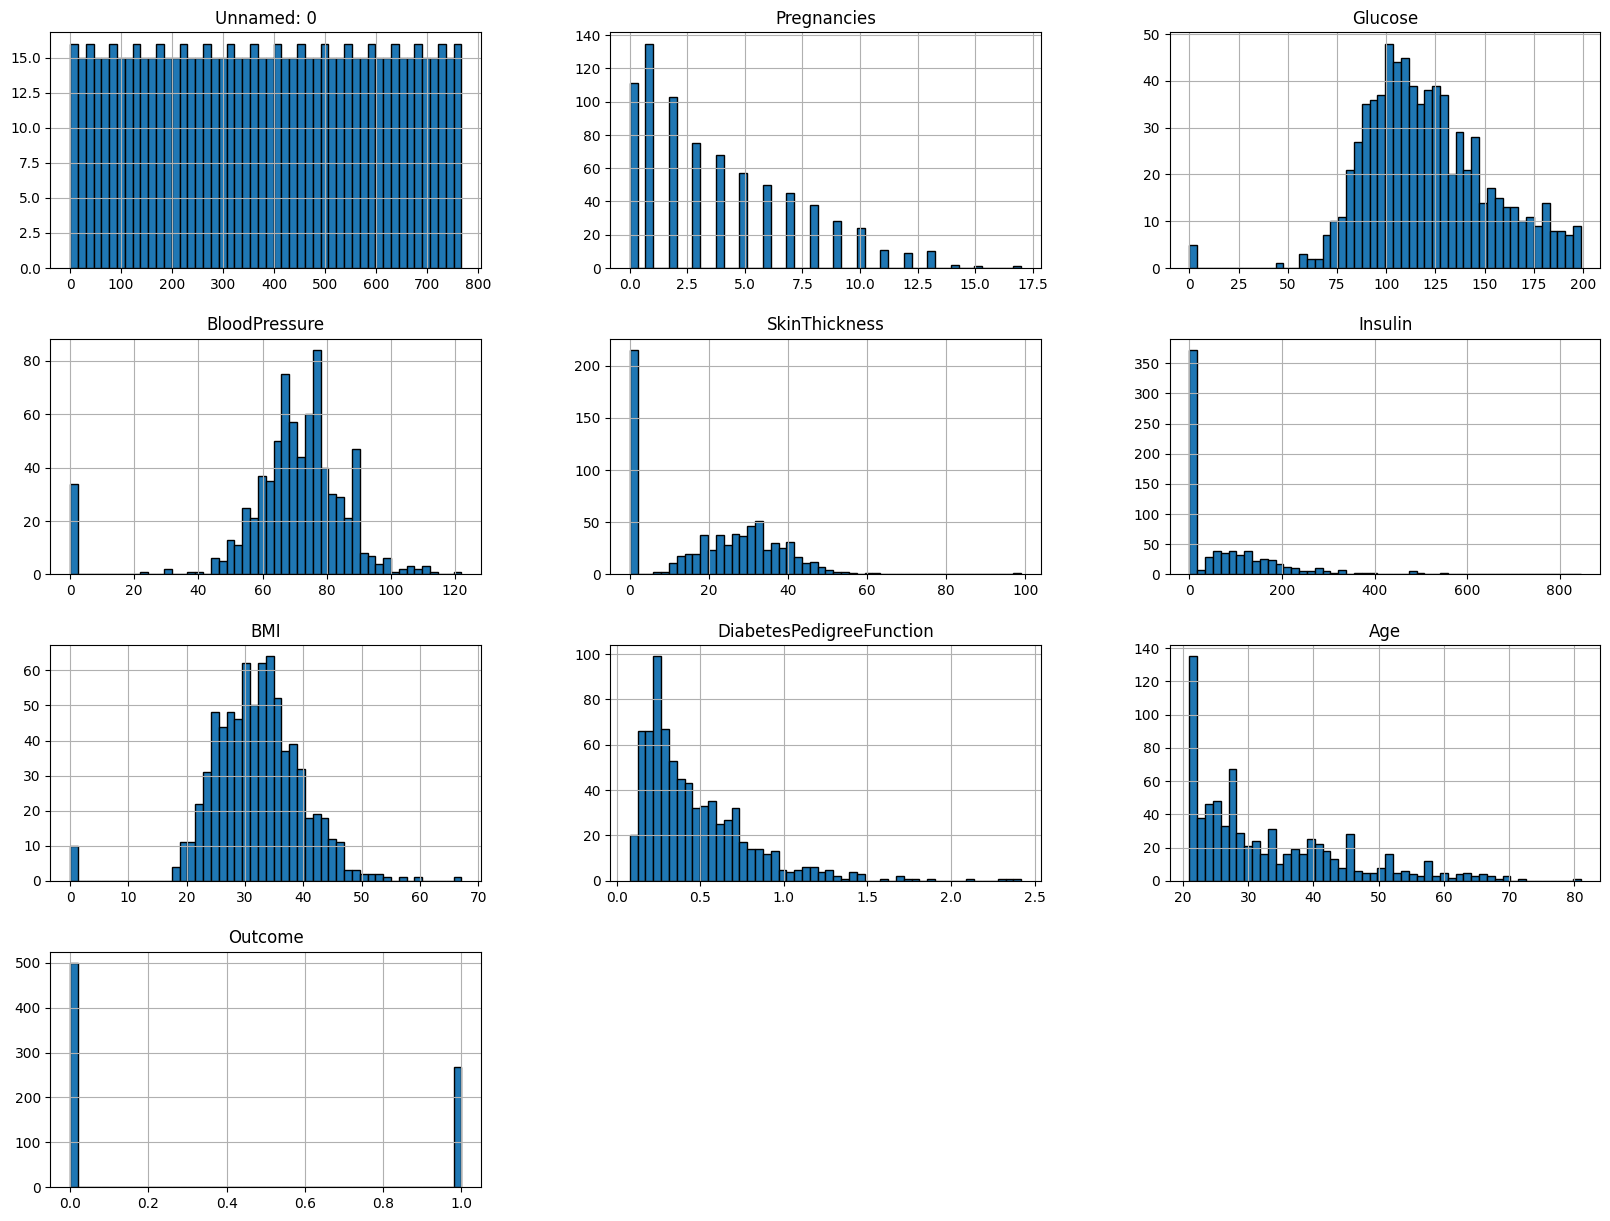

In [5]:
df_diabetes.hist(bins=50, edgecolor='k', figsize=(20,15))
plt.show()

### ⚠️
Antes de realizar cualquier procesamiento, no olvide de separar los datos en entrenamiento y prueba. Divida el conjunto de datos en entrenamiento y prueba utilizando train_test_split (con una proporción de 80% entrenamiento y 20% prueba) use 42 como semilla.

In [6]:
from sklearn.model_selection import train_test_split

# Eliminar columna innecesaria
df_diabetes = df_diabetes.drop('Unnamed: 0', axis=1, errors='ignore')

# Definir características y etiqueta
X = df_diabetes.drop('Outcome', axis=1)
y = df_diabetes['Outcome']

# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Verificar las dimensiones de los conjuntos
print(f"Registros para entrenamiento: {X_train.shape}")
print(f"Registros para prueba: {X_test.shape}")

Registros para entrenamiento: (614, 8)
Registros para prueba: (154, 8)


### Detección de valores atípicos y tratamiento de datos faltantes

- Analice con cuidado el rango de valores de los atributos. **¿Nota valores atípicos a simple vista en algún/algunos de los atributos?**

    -  Ejemplo: Un valor de insulina igual a 0 puede considerarse mal registrado o faltante.

- Reemplace los valores atípicos que detecte con np.Nan. Utilice el método [replace](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.replace.html) de pandas para reemplazarlos por np.NaN.

- Ahora estos valores atípicos pueden considerarse datos faltantes

In [7]:
# Verificamos los rangos de cada columna

import numpy as np
import pandas as pd

# Ver valores únicos y distribución
print("\nInformación general del dataset:")
print(df_diabetes.info())

# Verificar valores mínimos (posibles ceros anómalos)
print("\nValores mínimos por columna:")
print(df_diabetes.min())


Información general del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             767 non-null    float64
 3   SkinThickness             756 non-null    float64
 4   Insulin                   763 non-null    float64
 5   BMI                       767 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(5), int64(4)
memory usage: 54.1 KB
None

Valores mínimos por columna:
Pregnancies                  0.000
Glucose                      0.000
BloodPressure                0.000
SkinThickness                0.000
Insulin                      0.

In [8]:
import numpy as np

# Crear copias para evitar warnings
X_train_clean = X_train.copy()
X_test_clean = X_test.copy()

# Identificar valores imposibles en ciertas columnas
conditions = {
    'Glucose': 0,  
    'BloodPressure': 0, 
    'SkinThickness': 0,  
    'Insulin': 0,  
    'BMI': 0  
}

# Reemplazar estos valores con NaN
for column, value in conditions.items():
    X_train_clean[column] = X_train_clean[column].replace(value, np.nan)
    X_test_clean[column] = X_test_clean[column].replace(value, np.nan)

# Verificar la cantidad de valores faltantes
print("Valores faltantes en entrenamiento:")
print(X_train_clean.isna().sum())
print("\nValores faltantes en prueba:")
print(X_test_clean.isna().sum())

# Calcular porcentajes para mejor comprensión
print("\nPorcentaje de valores faltantes en entrenamiento:")
print((X_train_clean.isna().sum() / len(X_train_clean) * 100).round(2))

Valores faltantes en entrenamiento:
Pregnancies                   0
Glucose                       5
BloodPressure                24
SkinThickness               176
Insulin                     290
BMI                           7
DiabetesPedigreeFunction      0
Age                           0
dtype: int64

Valores faltantes en prueba:
Pregnancies                  0
Glucose                      0
BloodPressure               11
SkinThickness               51
Insulin                     84
BMI                          4
DiabetesPedigreeFunction     0
Age                          0
dtype: int64

Porcentaje de valores faltantes en entrenamiento:
Pregnancies                  0.00
Glucose                      0.81
BloodPressure                3.91
SkinThickness               28.66
Insulin                     47.23
BMI                          1.14
DiabetesPedigreeFunction     0.00
Age                          0.00
dtype: float64


### Imputar datos faltantes

- Grafique el histograma de cada atributo y para cada clase. ¿Cómo son las medianas de cada clase?

- Algo a tener en cuenta al momento de imputar datos faltantes es que los atributos pueden tener distribuciones diferentes según la salida o target (con diabetes/sin diabetes). Por ejemplo, una persona sana tendrá un valor de insulina en un rango distinto a una persona con diabetes.

- Calcule la mediana de cada atributo para los sanos y para los diabéticos usando el conjunto de entrenamiento.

- Impute la mediana de cada atributo en el conjunto de entrenamiento y en el conjunto de prueba.

- Utilice la función **fillna** de pandas ([Documentación](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.fillna.html)) para imputar los datos faltantes de cada atributo. Para esto reemplace los datos faltantes directamente sobre el conjunto de datos sin extraer las columnas. Se puede seguir los siguiente:

Para cada atributo. Identificar las filas en las que el paciente no tiene diabetes (Outcome == 0) y, además, falta el valor del atributo. Reemplazar esos valores faltantes en la columna del atributo con la mediana del atributo calculada para los pacientes sanos. Repetir lo mismo para los pacientes con diabetes.
Después hacer lo mismo sobre el conjunto de prueba

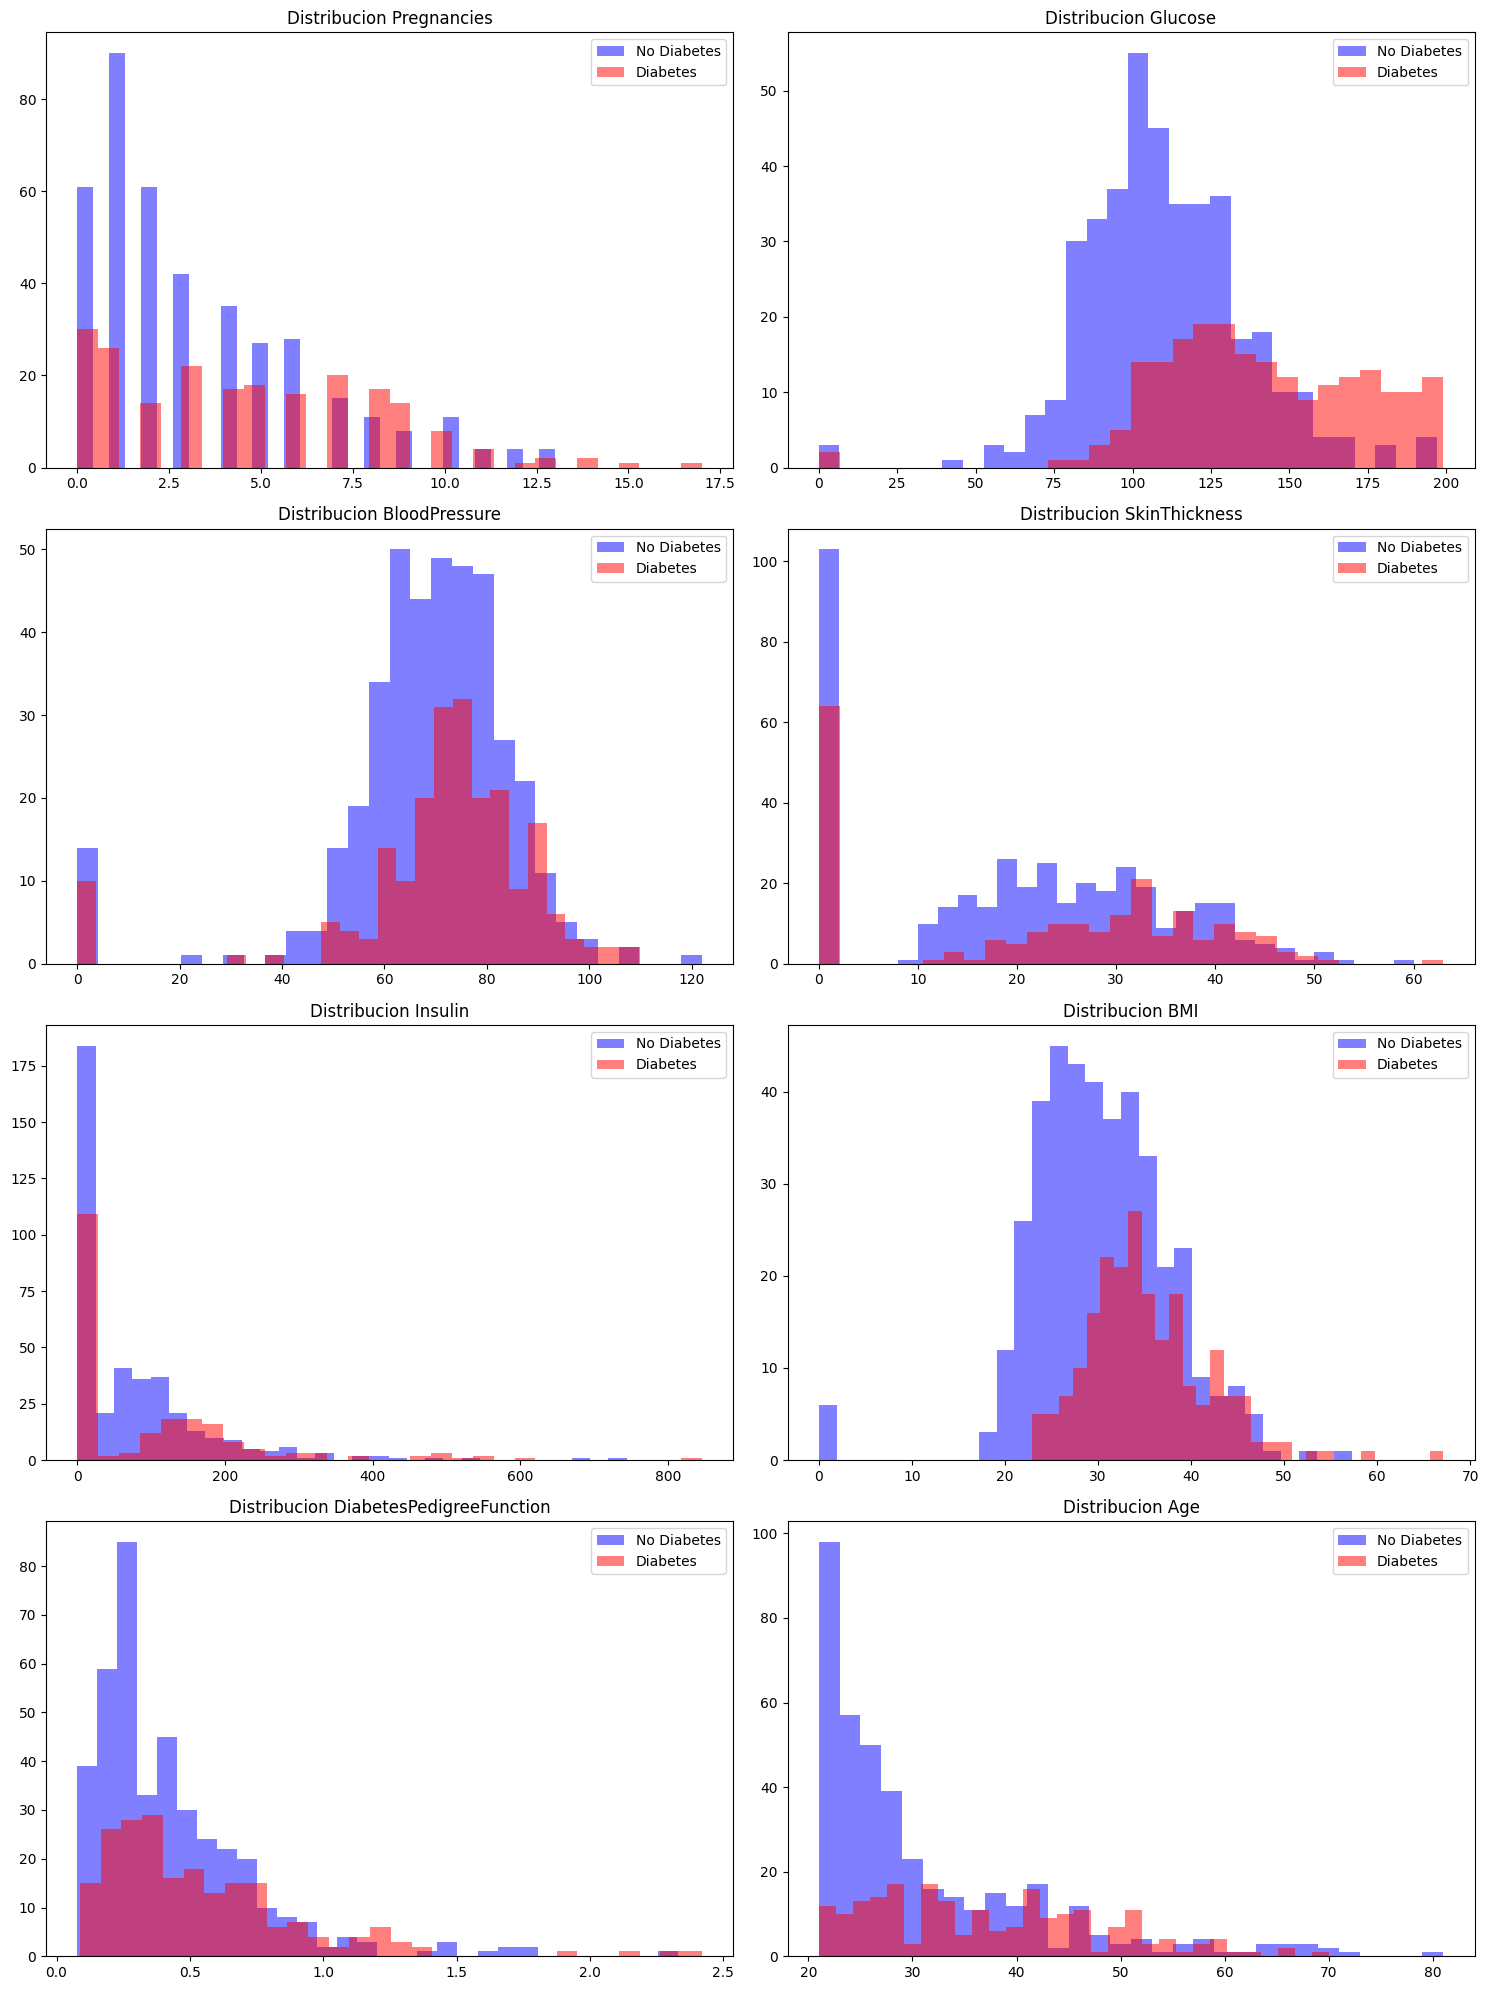


Medianas para pacientes con diabetes:
Pregnancies: 4.00
Glucose: 138.00
BloodPressure: 74.00
SkinThickness: 27.00
Insulin: 0.00
BMI: 34.30
DiabetesPedigreeFunction: 0.43
Age: 36.00

Medianas para pacientes sin diabetes:
Pregnancies: 2.00
Glucose: 108.00
BloodPressure: 70.00
SkinThickness: 21.00
Insulin: 46.50
BMI: 29.90
DiabetesPedigreeFunction: 0.34
Age: 26.00

Valores faltantes despues de imputar (Entrenamiento):
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
dtype: int64

Valores faltantes despues de imputar (Prueba):
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
dtype: int64


In [9]:
# Visualizar las distribuciones de las características por clase
fig, axes = plt.subplots(4, 2, figsize=(15, 20))
axes = axes.ravel()

# Histogramas para cada característica
features = X_train.columns
for idx, feature in enumerate(features):
    # Para pacientes no diabéticos (Outcome = 0)
    axes[idx].hist(X_train[feature][y_train == 0], bins=30, alpha=0.5, label='No Diabetes', color='blue')
    # Para pacientes diabéticos (Outcome = 1)
    axes[idx].hist(X_train[feature][y_train == 1], bins=30, alpha=0.5, label='Diabetes', color='red')
    axes[idx].set_title(f'Distribucion {feature}')
    axes[idx].legend()

plt.tight_layout()
plt.show()

# Calcular medianas por clase
medians_diabetic = {}
medians_non_diabetic = {}

for feature in features:
    medians_diabetic[feature] = X_train[feature][y_train == 1].median()
    medians_non_diabetic[feature] = X_train[feature][y_train == 0].median()

print("\nMedianas para pacientes con diabetes:")
for feature, median in medians_diabetic.items():
    print(f"{feature}: {median:.2f}")

print("\nMedianas para pacientes sin diabetes:")
for feature, median in medians_non_diabetic.items():
    print(f"{feature}: {median:.2f}")

# Imputar valores faltantes basados en la clase
for feature in features:
    # Entrenamiento
    X_train.loc[(y_train == 1) & (X_train[feature].isna()), feature] = medians_diabetic[feature]
    X_train.loc[(y_train == 0) & (X_train[feature].isna()), feature] = medians_non_diabetic[feature]

    # Prueba
    X_test.loc[(y_test == 1) & (X_test[feature].isna()), feature] = medians_diabetic[feature]
    X_test.loc[(y_test == 0) & (X_test[feature].isna()), feature] = medians_non_diabetic[feature]

# Verificar que no queden valores faltantes
print("\nValores faltantes despues de imputar (Entrenamiento):")
print(X_train.isna().sum())
print("\nValores faltantes despues de imputar (Prueba):")
print(X_test.isna().sum())

### Imputar datos faltantes usando un transformer

- Implemente un transformer para imputar datos faltantes de forma condicional, dependiendo de la clase (diabetes/no diabetes). Para hacerlo, utilice la mediana correspondiente a cada clase.
- Utilice un Pipeline de scikit-learn para realizar la preparación completa de los datos, que incluya la imputación de datos y estandarización. 

In [10]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np

class ConditionalMedianImputer(BaseEstimator, TransformerMixin):
    def __init__(self):
        self.medians_diabetic = {}
        self.medians_non_diabetic = {}
        self.features = []

    def fit(self, X, y=None):
        # Almacenar las características
        self.features = X.columns

        # Calcular las medianas para cada clase
        X_copy = X.copy()
        X_copy['Outcome'] = y  # Agregar temporalmente la variable objetivo para calcular las medianas

        for feature in self.features:
            self.medians_diabetic[feature] = X_copy[feature][X_copy['Outcome'] == 1].median()
            self.medians_non_diabetic[feature] = X_copy[feature][X_copy['Outcome'] == 0].median()

        return self

    def transform(self, X):
        X_transformed = X.copy()

        # Imputar valores faltantes basándose en las medianas calculadas durante el ajuste (fit)
        for feature in self.features:
            pass

        return X_transformed


In [11]:
# Crear un pipeline con ConditionalMedianImputer y StandardScaler
from sklearn import set_config
set_config(display='diagram')
pipeline = Pipeline([
    ('imputer', ConditionalMedianImputer()),
    ('scaler', StandardScaler())
])

# Ajustar y transformar los datos de entrenamiento
# Pasamos y_train al fit porque ConditionalMedianImputer lo necesita
X_train_processed = pipeline.fit_transform(X_train, y_train)

# Transformar los datos de prueba
X_test_processed = pipeline.transform(X_test)

# Mostrar los datos procesados (primeras filas)
print("\nDatos de Entrenamiento Procesados (primeras 5 filas):")
print(X_train_processed[:5])

print("\nDatos de Prueba Procesados (primeras 5 filas):")
print(X_test_processed[:5])

pipeline


Datos de Entrenamiento Procesados (primeras 5 filas):
[[-0.52639686 -1.15139792 -3.75268255 -1.36328068 -0.70208718 -4.20119465
  -0.49073479 -1.03594038]
 [ 1.58804586 -0.27664283  0.68034485  0.21235101 -0.70208718 -0.5034275
   2.41502991  1.48710085]
 [-0.82846011  0.56687102 -1.2658623  -0.11590559  0.01280042 -0.43786425
   0.54916055 -0.94893896]
 [-1.13052335  1.2541786  -1.04961706 -1.36328068 -0.70208718 -1.32952442
  -0.63929127  2.79212217]
 [ 0.68185612  0.41066475  0.57222224  1.06581818  2.48476113  1.8568494
  -0.68682934  1.13909516]]

Datos de Prueba Procesados (primeras 5 filas):
[[ 0.68185612 -0.71402038 -0.61712658  0.8032129   0.9344025   0.25710617
  -0.11637247  0.87809089]
 [-0.52639686 -0.27664283  0.30191569  0.73756158 -0.70208718  0.48002121
  -0.954231   -1.03594038]
 [-0.52639686 -0.40160784 -0.29275872 -1.36328068 -0.70208718 -0.16249862
  -0.9245197  -1.03594038]
 [ 1.28598261 -0.43284909  0.57222224 -1.36328068 -0.70208718 -0.97548288
   1.14932872  0

,steps,"[('imputer', ...), ('scaler', ...)]"
,transform_input,None
,memory,None
,verbose,False
,copy,True
,with_mean,True
,with_std,True
